In [24]:
import seaborn
import matplotlib.pyplot as plt

In [25]:
from pandagg import Elasticsearch

In [26]:
client = Elasticsearch(hosts=['localhost:9300'])

In [27]:
indices = client.fetch_indices()

In [28]:
movies = indices.movies

In [29]:
movies.mapping

<ClientBoundMapping>
root                                                            
├── directors                                              [Nested]
│   ├── director_id                                         Integer
│   ├── first_name                                          Text
│   │   └── raw                                           ~ Keyword
│   ├── genres                                              Keyword
│   └── last_name                                           Text
│       └── raw                                           ~ Keyword
├── genres                                                  Keyword
├── movie_id                                                Integer
├── name                                                    Text
│   └── raw                                               ~ Keyword
├── rank                                                    Float
├── roles                                                  [Nested]
│   ├── actor_id                         

In [32]:
from pandagg.agg import DateHistogram

decade = DateHistogram('movie_decade', field='year', fixed_interval='3650d')

per_decate_genres = movies.groupby(['genres', decade],size=5).execute()

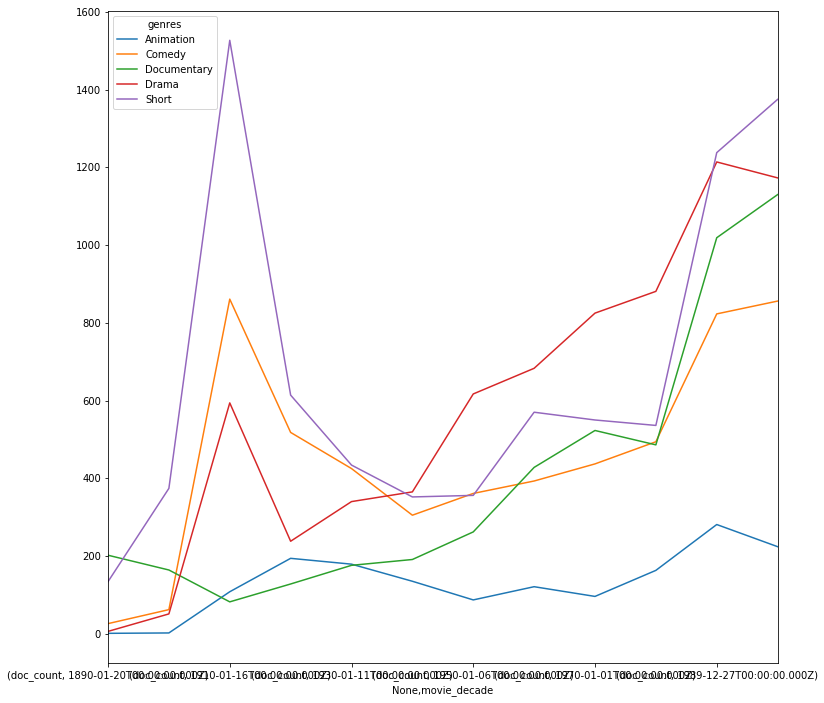

In [33]:
per_decate_genres.unstack().T.plot(figsize=(12,12))

In [42]:
from pandagg.agg import Avg
movies\
    .groupby(['roles.last_name.raw','roles.first_name.raw'])\
    .agg(Avg('avg_rank', field='rank'))\
    .execute()

avg_rank  doc_count
roles.last_name.raw roles.first_name.raw                     
Smith               Pete (I)              6.320000        185
                    William (I)           5.270000        168
                    Hal                   6.450000        115
                    C. Aubrey             6.342857        109
                    Cyril (I)             5.550000        103
                    Albert J.                  NaN         79
                    Lane (I)              5.000000         78
                    Tom (I)               6.100000         78
                    Frank (I)                  NaN         77
                    Charles (I)           6.175000         75
Williams            Charles (I)           6.333333        202
                    Guinn 'Big Boy'       6.600000        202
                    Kathlyn (I)                NaN        176
                    Robert (I)            6.087500        172
                    Earle                 8.800000        158
                    Robin (I)             7.125000        143
                    Lottie                6.392857        118
                    Roger (I)             6.050000        112
                    Clara (I)             6.900000         99
                    Ben (I)               5.900000         94
Lee                 Christopher (I)       5.163636        258
                    Wendee                6.200000        140
                    Bernard (I)           5.785714        104
                    Dae-yeob                   NaN        100
                    Lila (I)                   NaN        100
                    Duke R.               3.100000         88
                    Ruth                  5.466667         85
                    Danny (I)             6.600000         78
                    Dae-kun                    NaN         77
                    Anna (I)              6.500000         76
...                                            ...        ...
Wilson              Charles C.            6.411111        229
                    Tom (I)               6.550000        221
                    Clarence (I)          6.650000        186
                    Harry (I)             6.116667        165
                    Lois (I)              6.300000        153
                    Ben F.                     NaN        146
                    Georges               5.000000         99
                    Hal (I)                    NaN         94
                    Millard K.                 NaN         87
                    Dale (I)                   NaN         84
Miller              Walter (I)            5.766667        227
                    W. Chrystie           6.350000        137
                    Dick (I)              5.172727        128
                    Sidney (I)            6.300000        106
                    Marvin (I)            5.833333        105
                    Ivan                  6.050000         91
                    Stephen E.            5.433333         90
                    Harold (I)            6.540000         83
                    Patsy Ruth                 NaN         77
                    John 'Skins'          6.450000         75
Moore               Owen                  5.800000        276
                    Matt (I)              6.083333        206
                    Tom (I)               6.700000        172
                    Dennis                4.916667        163
                    Roger (I)             5.100000        144
                    Dickie                6.620000        105
                    Charles R.            5.800000         91
                    Ida                   5.300000         77
                    Clayton               5.700000         76
                    Roger (II)            6.055556         74

[100 rows x 2 columns]

In [43]:
movies.mapping.rank.a.stats()

,avg,count,max,min,sum
NaN,5.829632,19108,9.9,1.0,111392.600001
